# Stock Market Index Prediction with Recurrent Neural Network

## Part 1 - Data Preprocessing

In [1]:
# Importing libraries for the analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

The historical data of BIST 100 (XU100) for was downloaded from [investing.com](https://www.investing.com/indices/ise-100-historical-data)

In [2]:
# Importing the training set
dataset_train = pd.read_csv('BIST_100_Historical_Data_Training.csv')
training_set = dataset_train.iloc[:, 1:2].values  # generate numpy array with a single column

In [3]:
# Get the training set shape - There are 1234 data points are available in the training set.
print('The number of rows in the training set is ' +str(training_set.shape[0]))

The number of rows in the training set is 1234


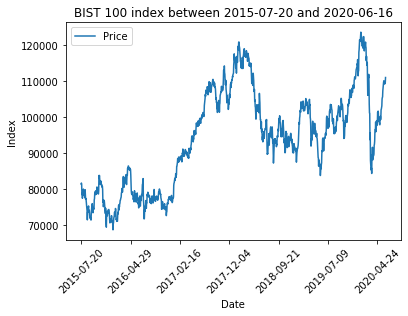

In [4]:
# Plot the change in stock market for the training set
dataset_train.plot(x='Date',y='Price',rot=45, title = 'BIST 100 index between '+ \
                   str(dataset_train['Date'].min()) +' and '+str(dataset_train['Date'].max()))
plt.xlabel('Date')
plt.ylabel('Index')
plt.show()

In [5]:
# Apply feature scaling
from sklearn.preprocessing import MinMaxScaler
fs = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = fs.fit_transform(training_set)

In [6]:
# Creating a data structure for a given timestep and 1 output
timestep = 60
X_train = []   # input
y_train = []   # output
for i in range(timestep, training_set.shape[0]):
    X_train.append(training_set_scaled[i-timestep:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building the RNN

In [7]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
# Initialising the RNN
model_SMI = Sequential()

In [9]:
# Adding the first LSTM layer and some Dropout regularisation
model_SMI.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_SMI.add(Dropout(0.2))

In [10]:
# Adding a second LSTM layer and some Dropout regularisation
model_SMI.add(LSTM(units = 50, return_sequences = True))
model_SMI.add(Dropout(0.2))

In [11]:
# Adding a third LSTM layer and some Dropout regularisation
model_SMI.add(LSTM(units = 50, return_sequences = True))
model_SMI.add(Dropout(0.2))

In [12]:
# Adding a fourth LSTM layer and some Dropout regularisation
model_SMI.add(LSTM(units = 50))
model_SMI.add(Dropout(0.2))

In [13]:
# Adding the output layer
model_SMI.add(Dense(units = 1))

In [14]:
# Compiling the RNN
model_SMI.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_SMI.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1174/1174 [==============================] - 15s 13ms/step - loss: 0.0422
Epoch 2/100
1174/1174 [==============================] - 10s 9ms/step - loss: 0.0107
Epoch 3/100
1174/1174 [==============================] - 10s 9ms/step - loss: 0.0102
Epoch 4/100
1174/1174 [==============================] - 10s 9ms/step - loss: 0.0079
Epoch 5/100
1174/1174 [==============================] - 10s 9ms/step - loss: 0.0070
Epoch 6/100
1174/1174 [==============================] - 10s 9ms/step - loss: 0.0062
Epoch 7/100
1174/1174 [==============================] - 11s 9ms/step - loss: 0.0063
Epoch 8/100
1174/1174 [==============================] - 10s 9ms/step - loss: 0.0066
Epoch 9/100
1174/1174 [==============================] - 10s 9ms/step - loss: 0.0078
Epoch 10/100
1174/1174 [==============================] - 10s 9ms/step - loss: 0.0068
Epoch 11/100
1174/1174 [==============================] - 10s 9ms/step - loss: 0.0060
Epoch 12/100
1174/1174 [==============================] - 10s 

1174/1174 [==============================] - 11s 10ms/step - loss: 0.0014
Epoch 97/100
1174/1174 [==============================] - 12s 10ms/step - loss: 0.0016
Epoch 98/100
1174/1174 [==============================] - 12s 10ms/step - loss: 0.0014
Epoch 99/100
1174/1174 [==============================] - 10s 9ms/step - loss: 0.0017
Epoch 100/100
1174/1174 [==============================] - 10s 8ms/step - loss: 0.0015


## Part 3 - Making the predictions and visualising the results

In [15]:
# Getting the real index value of July 2020
dataset_test = pd.read_csv('BIST_100_Historical_Data_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
testdata_timerange = dataset_test.iloc[:, 0:1].values
testdata_timerange= testdata_timerange.astype("datetime64")

In [16]:
# Getting the predicted index value of July 2020
dataset_total = pd.concat((dataset_train['Price'], dataset_test['Price']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timestep:].values
inputs = inputs.reshape(-1,1)  # convert to correct nparray format
inputs = fs.transform(inputs)
X_test = []
for i in range(timestep, timestep + len(dataset_test)):
    X_test.append(inputs[i-timestep:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model_SMI.predict(X_test)
predicted_stock_price = fs.inverse_transform(predicted_stock_price)

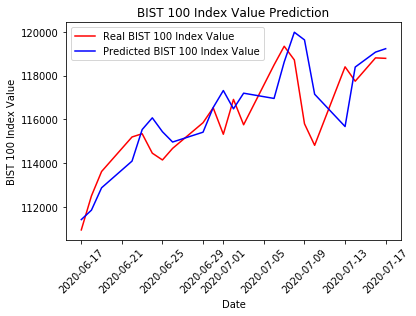

In [17]:
# Visualising the real and predicted values
plt.plot(testdata_timerange,real_stock_price, color = 'red', label = 'Real BIST 100 Index Value')
plt.plot(testdata_timerange,predicted_stock_price, color = 'blue', label = 'Predicted BIST 100 Index Value')
plt.title('BIST 100 Index Value Prediction')
plt.xlabel('Date')
plt.ylabel('BIST 100 Index Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()